In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pdb
import matplotlib.gridspec as gridspec
from pylab import *
from matplotlib.colors import LinearSegmentedColormap

In [51]:
znu = np.array([1009.7593   , 1004.12976  ,  997.94244  ,  987.29205  ,
        975.9316   ,  964.26685  ,  952.3993   ,  940.78534  ,
        929.12054  ,  917.5066   ,  906.39966  ,  895.7494   ,
        879.5708   ,  857.8643   ,  837.1722   ,  816.93634  ,
        796.70056  ,  776.46484  ,  756.73627  ,  737.5655   ,
        718.85126  ,  700.64417  ,  682.9442   ,  665.7514   ,
        648.5586   ,  631.36584  ,  614.73096  ,  598.806    ,
        583.13477  ,  567.71704  ,  552.55286  ,  537.64233  ,
        512.8421   ,  478.71008  ,  446.0996   ,  415.26413  ,
        386.45734  ,  359.17203  ,  333.15466  ,  308.8616   ,
        286.09003  ,  264.33276  ,  243.94487  ,  225.02774  ,
        207.27705  ,  190.49     ,  174.76799  ,  160.11101  ,
        146.36691  ,  133.58644  ,  121.566696 ,  110.459854 ,
         95.44786  ,   77.49433  ,   62.178047 ,   49.093273 ,
         37.986427 ,   28.502497 ,   20.641489 ,   14.149816 ,
          8.621753 ,    3.0429711])


z = [40,87.5,141,233,333,436,542,646,752,858,961, 1060,1213,1421,1623,1825,2031,2241,2450,2657,2863,3068,3271,
     3472,3678,3887,4094,4297,4500,4705,4910,5116,5471,5978,6488,6997,7500,8005,8513,9013,9509,10009,10503,10988,
     11468,11949,12425,12896,13165,13356,13829,14294,14754,15447,16374,17302,18242,19190,20148,21200,22250,22500]

In [71]:
mdir = '/Users/acasalla/Documents/PhD/Thesis/Data_to_plot/'
nx=256
ny=256
nz=62
npts=nx*ny # hardwired for moment
hovchunk=1024  #1024 # averaging length for chunking, power of 2, larger=smoother.
nhov=int(npts/hovchunk)
hovx=100*(np.arange(nhov)+0.5)/nhov

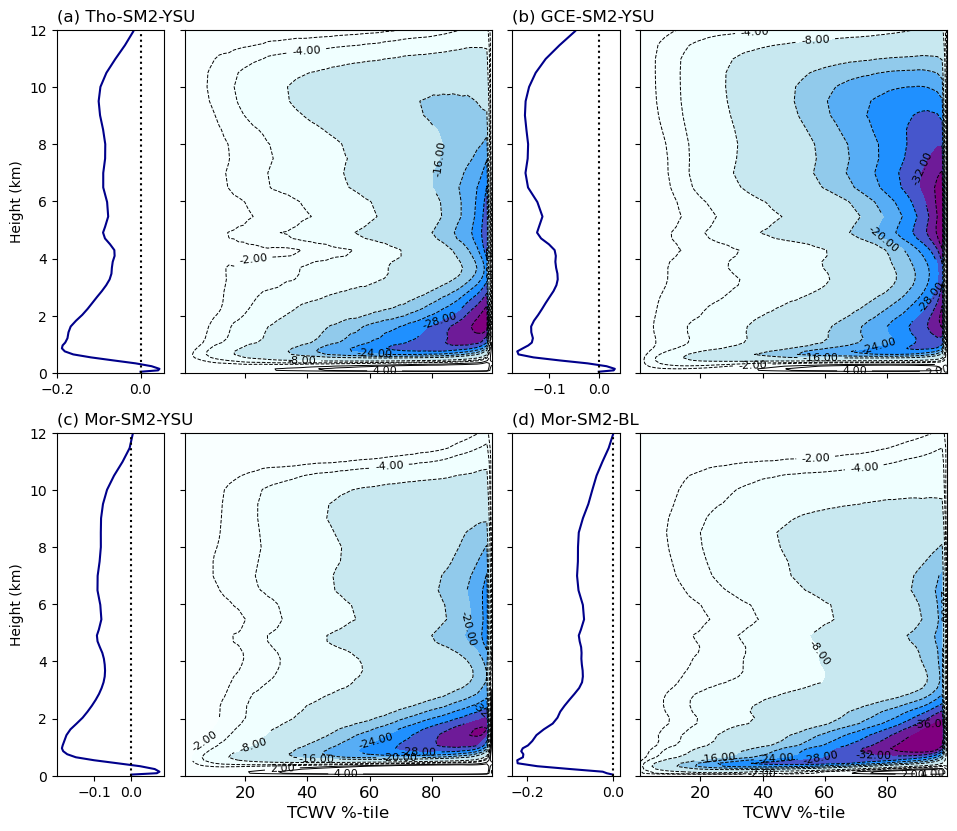

In [104]:
stas = [2]#,2,10,15,35]
ends = [5]#,7,15,20,40]
runs = ['ThoYSU','GCEYSU','MorYSU','MorBL']
cmap=LinearSegmentedColormap.from_list('', ['purple','dodgerblue','lightblue','azure','white',])
sfleves = [-36,-32,-28,-24,-20,-16,-8,-4,-2,2,4]
#sfleves = [-35,-30,-25,-20,-15,-10,-5,5]
#sfleves = [-45,-30,-15,-10,5]
pos = [1,3,5,7]

for j,sta in enumerate(stas):
    fig = plt.figure(figsize=(10,10))
    gs = GridSpec(3,4,left = 0.09, right = 0.98, hspace=0.25, wspace=0.1, top = 0.92, bottom = 0.08, 
                  height_ratios = [1,1,0.1], width_ratios = [0.35,1,0.35,1])
    titles = ['(a)','(b)','(c)','(d)','(e)','(f)','(g)','(h)']
    runi = ['Tho-SM2-YSU','GCE-SM2-YSU','Mor-SM2-YSU','Mor-SM2-BL']
    for i,run in enumerate(runs):
        cdf = pd.read_csv(mdir+run+'_wvel_dry_transport_'+str(sta)+'_'+str(ends[j])+'.csv')
        cdf = cdf.drop('Unnamed: 0', axis = 1)
        ax = plt.subplot(gs[pos[i]])
        im = plt.contourf(hovx, np.array(z)/1000, np.array(cdf)*100, cmap = cmap, 
                          levels = sfleves, extend = 'both')
        cssf = plt.contour(hovx,np.array(z)/1000,np.array(cdf)*100, colors = 'k', 
                           levels=sfleves,linewidths = 0.7)
        plt.clabel(cssf, fontsize=8, inline=1,fmt = '%1.2f')
        #plt.ylim(1000,600)
        plt.ylim(0,12)
        ax.yaxis.set_major_formatter(NullFormatter())
        if i > 1:
            plt.xlabel('TCWV %-tile', fontsize = 12)
            plt.xticks(fontsize=12)
        else: 
            ax.xaxis.set_major_formatter(NullFormatter())

pos1 = [0,2,4,6]

for i,run in enumerate(runs):
    cdf = pd.read_csv(mdir+run+'_wvel_dry_transport_'+str(sta)+'_'+str(ends[j])+'.csv')
    cdf = cdf.drop('Unnamed: 0', axis = 1)
    ax = plt.subplot(gs[pos1[i]])
    plt.plot(cdf.mean(axis=1),np.array(z)/1000, color = 'darkblue')
    plt.ylim(0,12)
    plt.axvline(0, linestyle = ':', color = 'k')
    plt.title(titles[i]+' '+runi[i], loc = 'left')
    if i == 0 or i == 2:
        plt.ylabel('Height (km)')
    else:
        ax.yaxis.set_major_formatter(NullFormatter())

plt.savefig(f'/Users/acasalla/Documents/PhD/Thesis/Plots/Stream_function_only_dry_patch.jpg', bbox_inches = 'tight', dpi = 300)
plt.savefig(f'/Users/acasalla/Documents/PhD/Thesis/Plots/Stream_function_only_dry_patch.pdf', bbox_inches = 'tight', dpi = 300)